In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn


from lstm_model import SimpleLSTM
from optimization import Optimization
from sklearn.preprocessing import StandardScaler

sns.set(font_scale=1.3)
%matplotlib inline

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
NASDAQ_DATA_PATH = "/content/drive/My Drive/HobbyTaste/data/nasdaq100_padding.csv"

In [113]:
data_nasdaq = pd.read_csv(NASDAQ_DATA_PATH)
data_nasdaq.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,AMZN,ATVI,AVGO,BBBY,BIDU,BIIB,CA,CELG,CERN,CMCSA,COST,CSCO,CSX,CTRP,CTSH,DISCA,DISH,DLTR,EA,EBAY,ESRX,EXPE,FAST,FB,FOX,FOXA,GILD,GOOGL,INTC,JD,...,LBTYK,LRCX,MAR,MAT,MCHP,MDLZ,MSFT,MU,MXIM,MYL,NCLH,NFLX,NTAP,NVDA,NXPI,PAYX,PCAR,PYPL,QCOM,QVCA,ROST,SBUX,SIRI,STX,SWKS,SYMC,TMUS,TRIP,TSCO,TSLA,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.80,97.80,61.15,95.4000,58.180000,58.00,127.040,26.680,165.8100,742.12,42.30,161.41,44.21,159.89,286.32,34.57,106.0500,62.070000,67.34,167.60,30.790,28.3700,43.52,58.40,25.42,52.440000,96.55,76.95,30.60,76.54,117.88,41.990,121.940,27.50,26.86,84.00,756.5700,34.7700,21.8000,...,30.21,91.24,71.1100,32.78,54.78,45.690,56.515,14.0000,39.20,47.130,41.900,91.00,26.4400,56.1984,85.2300,60.740,56.170,37.7700,60.95,26.74,61.13,58.579,4.280,31.350,65.36,20.37,44.950,70.0500,91.41,227.6500,70.73,45.230,31.1701,95.270,81.365,52.16,33.95,48.61,38.010,4665.054
1,35.9310,96.89,97.80,61.61,95.4115,58.190000,58.12,126.060,26.730,165.9101,741.92,42.44,161.83,44.09,160.13,286.81,34.58,105.5450,61.930000,67.30,167.82,30.840,28.4625,43.52,58.33,25.41,52.110000,96.82,77.07,30.74,76.44,117.99,41.900,121.745,27.48,26.87,83.97,756.1600,34.9200,21.8500,...,30.43,91.33,70.8500,32.79,54.89,45.730,56.720,14.0000,39.37,47.150,41.810,91.16,26.4500,56.4150,86.1750,60.935,56.850,37.7400,60.92,26.72,61.43,58.480,4.270,31.010,65.25,20.41,44.975,70.2300,91.05,227.0967,70.69,45.010,31.1900,94.170,81.540,52.15,34.10,48.74,38.140,4665.054
2,35.9044,96.95,97.57,61.98,95.5100,58.203333,57.95,126.510,26.712,166.1800,739.60,42.46,162.50,43.86,160.00,286.13,34.59,106.5787,61.916667,67.23,167.96,30.880,28.3900,43.54,58.34,25.38,52.106667,96.89,77.25,30.80,76.09,118.63,41.735,121.452,27.41,26.82,84.00,755.6200,34.9192,21.7700,...,30.17,91.37,70.7800,32.83,55.14,45.800,56.700,14.0056,39.38,47.130,41.865,91.36,26.3900,56.4900,85.6801,61.000,57.500,37.7117,61.03,26.66,61.55,58.510,4.285,31.195,65.41,20.39,44.810,70.0925,91.18,226.6300,71.30,45.015,31.2100,94.749,81.530,52.27,34.01,48.99,38.150,4665.826
3,35.8900,96.97,97.55,62.09,95.5200,58.216667,57.96,126.280,26.740,166.1480,739.55,42.52,162.68,43.80,160.12,286.80,34.61,106.3500,61.903333,67.38,167.85,30.890,28.3900,43.55,58.54,25.37,52.103333,96.76,76.96,30.86,75.65,118.57,41.710,121.450,27.42,26.87,83.34,756.3599,34.9510,21.8100,...,30.10,91.42,70.8750,32.86,55.31,45.790,56.690,14.0573,39.42,47.115,41.920,92.28,26.3955,56.5335,85.6650,61.008,57.750,37.8250,61.13,26.73,61.50,58.470,4.280,31.140,65.24,20.37,44.690,69.9550,91.28,227.5300,71.31,45.020,31.2100,94.310,81.710,52.30,33.96,48.95,38.195,4667.081
4,36.0080,96.96,97.73,61.89,95.5300,58.230000,58.21,126.585,26.720,165.9900,738.72,42.61,162.75,43.92,160.86,286.42,34.62,106.0000,61.890000,67.30,168.44,30.875,28.3900,43.63,58.56,25.32,52.100000,96.76,77.03,30.89,76.50,118.42,41.820,121.380,27.40,26.83,82.48,755.6700,34.9500,21.8593,...,30.12,91.45,71.1299,32.86,55.28,45.765,56.690,14.0701,39.54,47.010,41.920,91.86,26.4010,56.5200,85.8700,61.110,57.165,37.7972,61.16,26.68,61.42,58.490,4.215,31.050,65.33,20.36,44.610,69.7401,91.16,227.1250,71.06,45.050,31.1800,94.155,81.720,52.30,34.17,48.89,38.320,4664.491


Рассмотрим данные по акциям компании Apple - AAPL.

In [0]:
data_apple = data_nasdaq['AAPL'][:10000]
test_size = 1000

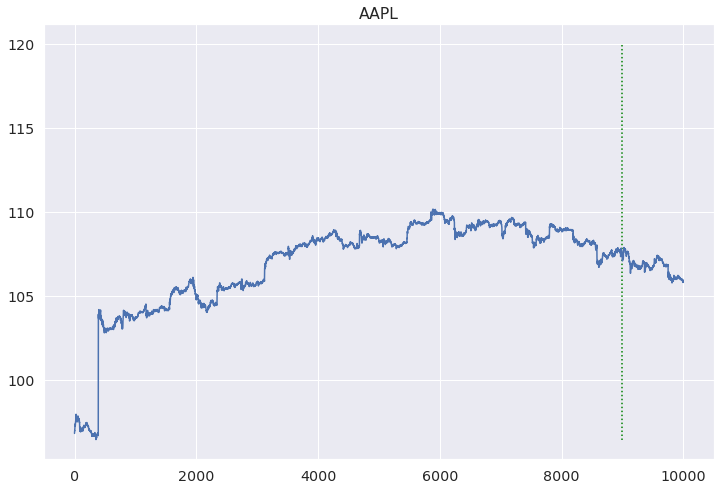

In [115]:
data_apple.plot(title='AAPL', figsize=(12, 8))
plt.vlines(len(data_apple) - test_size, 
           ymin=np.min(data_apple), 
           ymax=120, 
           color='green', 
           ls=':')
plt.show()

In [0]:
train_data_aapl = data_apple[:-test_size].values
test_data_aapl = data_apple[-test_size:].values

In [0]:
scaler = StandardScaler()
train_data_aapl = scaler.fit_transform(train_data_aapl.reshape(-1, 1))

In [0]:
model = SimpleLSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimization = Optimization(model, loss_function, optimizer)

In [0]:
train_inout_data = optimization.preprocess_data(
    torch.FloatTensor(train_data_aapl), 
    train_horizon=30
) #работу с данными наверно стоит вложить в класс

In [142]:
optimization.train(train_inout_data, num_epochs=10)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:   0 loss: 0.01017150
epoch:   1 loss: 0.01104918
epoch:   2 loss: 0.00986661
epoch:   3 loss: 0.00938127
epoch:   4 loss: 0.00911492
epoch:   5 loss: 0.00887849
epoch:   6 loss: 0.00840339
epoch:   7 loss: 0.00885423
epoch:   8 loss: 0.00884929
epoch:   9 loss: 0.00910752
epoch:   9 loss: 0.0091075161


In [0]:
train_horizon = 30
pred_horizon = test_size
test_inputs = list(train_data_aapl.reshape(len(train_data_aapl))[-train_horizon:])

In [0]:
predictions = optimization.predict(test_inputs, test_size, train_horizon)
predictions = scaler.inverse_transform(predictions).reshape(-1, 1)

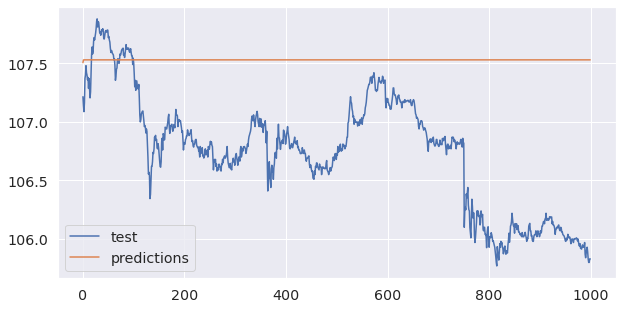

In [150]:
plt.figure(figsize=(10, 5))
plt.plot(test_data_appl, label='test')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

Предсказание получилось почти константным, возможно это произошло из-за плохого выбора `pred_horizon`, т.к. я строил предсказание динамически.

Данные об электричестве.

In [0]:
ELEC_PROD_DATA_PATH = "/content/drive/My Drive/HobbyTaste/data/Electric_Production.csv"

In [125]:
electric_production_data = pd.read_csv(ELEC_PROD_DATA_PATH)
electric_production_data.head(), electric_production_data.shape

(       DATE  IPG2211A2N
 0  1/1/1985     72.5052
 1  2/1/1985     70.6720
 2  3/1/1985     62.4502
 3  4/1/1985     57.4714
 4  5/1/1985     55.3151, (397, 2))

In [0]:
test_size = 50

In [0]:
train_electric = electric_production_data[:-test_size].values[:, 1]
test_electric = electric_production_data[-test_size:].values[:, 1]

In [0]:
scaler = StandardScaler()
train_electric = scaler.fit_transform(train_electric.reshape(-1, 1))

In [0]:
#train_inout_data = preprocess_data(torch.FloatTensor(train_electric))

In [0]:
model = SimpleLSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimization = Optimization(model, loss_function, optimizer)

In [0]:
train_inout_data = optimization.preprocess_data(
    torch.FloatTensor(train_electric), 
    train_horizon=30
) #работу с данными наверно стоит вложить в класс

In [131]:
optimization.train(train_inout_data, num_epochs=100)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:   0 loss: 0.03394784
epoch:   1 loss: 0.02097459
epoch:   2 loss: 0.24947236
epoch:   3 loss: 0.22897646
epoch:   4 loss: 0.22035219
epoch:   5 loss: 0.20579045
epoch:   6 loss: 0.19027250
epoch:   7 loss: 0.18559158
epoch:   8 loss: 0.16772003
epoch:   9 loss: 0.14744201
epoch:  10 loss: 0.12647447
epoch:  11 loss: 0.10950458
epoch:  12 loss: 0.09720510
epoch:  13 loss: 0.08876967
epoch:  14 loss: 0.08311990
epoch:  15 loss: 0.07952803
epoch:  16 loss: 0.07069679
epoch:  17 loss: 0.05556531
epoch:  18 loss: 0.12395960
epoch:  19 loss: 0.05153843
epoch:  20 loss: 0.04647495
epoch:  21 loss: 0.16435745
epoch:  22 loss: 0.04651708
epoch:  23 loss: 0.04536372
epoch:  24 loss: 0.04501012
epoch:  25 loss: 0.04340846
epoch:  26 loss: 0.04052998
epoch:  27 loss: 0.03711035
epoch:  28 loss: 0.03107141
epoch:  29 loss: 0.27359197
epoch:  30 loss: 0.04028639
epoch:  31 loss: 0.03559947
epoch:  32 loss: 0.03509756
epoch:  33 loss: 0.03351155
epoch:  34 loss: 0.03090969
epoch:  35 loss: 0.0

In [0]:
train_horizon = 30
test_inputs = list(train_electric.reshape(len(train_electric))[-train_horizon:])

In [0]:
predictions = optimization.predict(test_inputs, test_size, train_horizon)

In [0]:
predictions = scaler.inverse_transform(predictions).reshape(-1, 1)

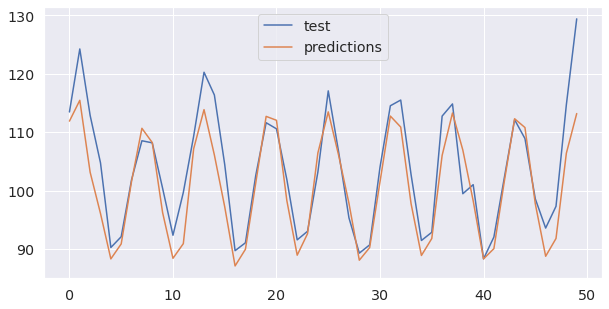

In [135]:
plt.figure(figsize=(10, 5))
plt.plot(test_electric, label='test')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

In [136]:
# RMSE
np.sqrt(((predictions - test_electric)**2).mean())

13.94532063483629